In [1]:
import tensorflow as tf
from utils import TLClassifier, crop_roi_image, make_bounding_boxes
from utils import detect_traffic_light_color, write_text
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

2023-10-03 15:48:08.171560: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 15:48:08.207504: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-03 15:48:08.207544: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-03 15:48:08.207569: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-03 15:48:08.213710: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 15:48:08.214305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
model_path = 'model/frozen_inference_graph.pb'

tlc = TLClassifier(model_path)

2023-10-03 15:48:10.558005: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled


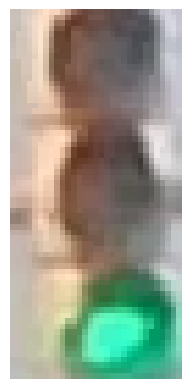

In [3]:
img = Image.open('Test_Images/lajpat.png')
img_np = np.asarray(img)[:, :, :3]

boxes = tlc.detect_multi_object(img_np, score_threshold=0.3)
cropped_image = crop_roi_image(img_np, boxes[0]) #choosing the first box

plt.imshow(cropped_image)
plt.axis('off')
plt.show()

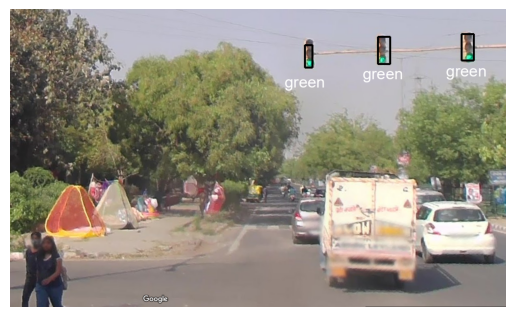

In [4]:
for box in boxes:
    make_bounding_boxes(img, box)
    cropped_image = crop_roi_image(img_np, box)
    pred_color = detect_traffic_light_color(cropped_image)
    write_text(img, pred_color, (box[3], box[0]), text_color=(255,255,255))

plt.imshow(img)
plt.axis('off')
plt.show()